In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/leaf_dis.zip

Archive:  /content/drive/MyDrive/leaf_dis.zip
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0378.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC

In [4]:
data = '/content/rice_leaf_diseases'

In [5]:
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['Leaf smut', 'Brown spot', 'Bacterial leaf blight']
3


In [7]:
brownspot = [data + '/Brown spot/' + img for img in os.listdir(data + '/Brown spot')[:9]]
leafblight = [data  + '/Bacterial leaf blight/' + img for img in os.listdir(data + '/Bacterial leaf blight')[:9]]
leafsmut = [data  + '/Leaf smut/' + img for img in os.listdir(data + '/Leaf smut')[:9]]

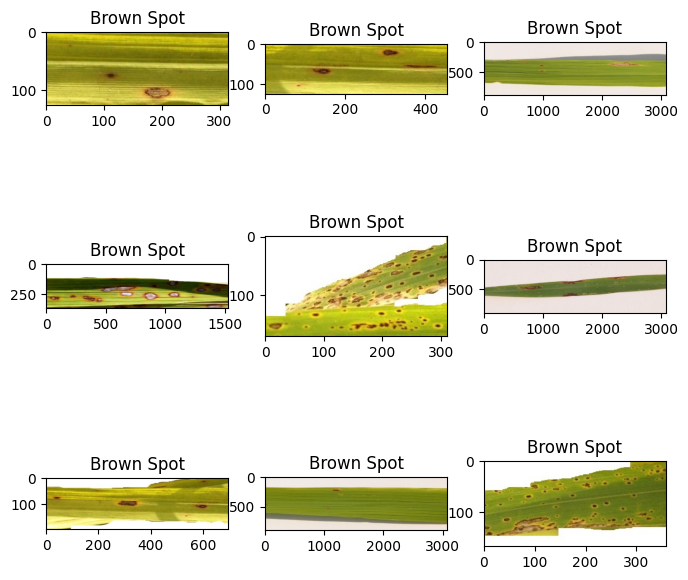

In [8]:
from PIL import Image
plt.figure(figsize=(8,8))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

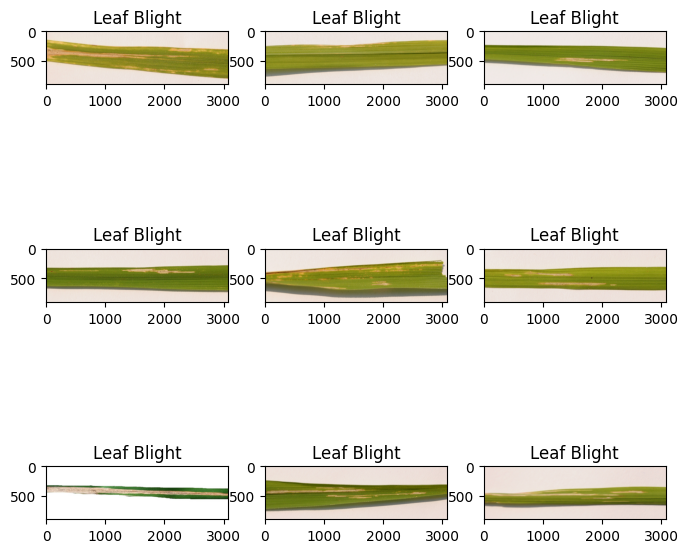

In [9]:
plt.figure(figsize=(8,8))
for i,k  in enumerate(leafblight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blight")

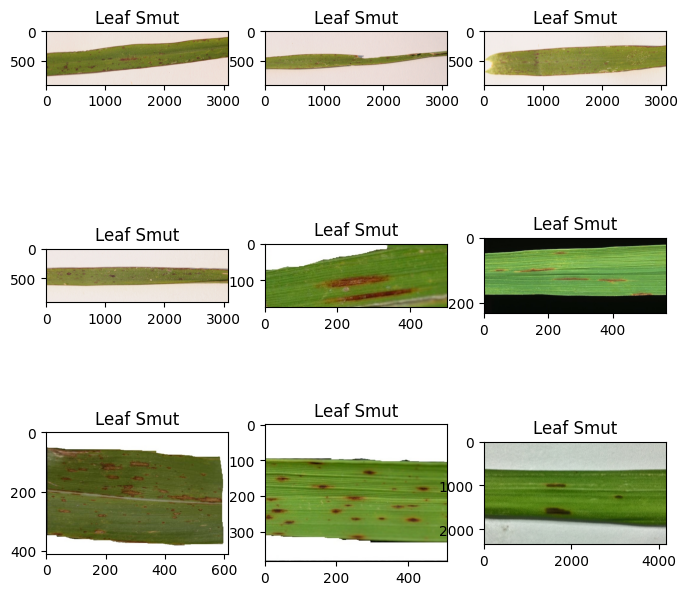

In [10]:
plt.figure(figsize=(8,8))
for i,k  in enumerate(leafsmut):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Smut")

In [11]:
label = []
image = []
image_width = 500
image_height = 500


for i in os.listdir("/content/rice_leaf_diseases/"): # First loop for label names
        for j in  os.listdir("/content/rice_leaf_diseases/"+i):# secound lopp for image names

            img = cv2.imread("/content/rice_leaf_diseases/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)

x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [12]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [13]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)


In [14]:
# Scale value
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
# Data Augmentation
data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

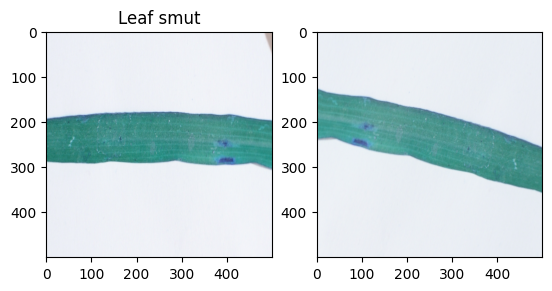

In [16]:
# Orignal Image
plt.subplot(1,2,1)
plt.imshow(x[20] / 255.0)  # Normalize the image for displaying
plt.title(label[20])

# Data Agumentataion Applayed Image
plt.subplot(1,2,2)
augmented_image = data_agu(x)[20]  # Augment the image
plt.imshow(augmented_image / 255.0)  # Normalize the augmented image for displaying


In [17]:

# Define the model architecture
model = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])



In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch=100
history = model.fit(x_train,y_train,epochs=epoch, validation_data=(x_test,y_test))

Epoch 1/100
3/3 [==============================] - 17s 768ms/step - loss: 15.4461 - accuracy: 0.3021 - val_loss: 19.9047 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 1s 261ms/step - loss: 11.9213 - accuracy: 0.3333 - val_loss: 4.0925 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 1s 243ms/step - loss: 2.5220 - accuracy: 0.3333 - val_loss: 1.1468 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 1s 222ms/step - loss: 1.1001 - accuracy: 0.3542 - val_loss: 1.0771 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 1s 199ms/step - loss: 1.0493 - accuracy: 0.4167 - val_loss: 0.9807 - val_accuracy: 0.4167
Epoch 6/100
3/3 [==============================] - 1s 231ms/step - loss: 0.9964 - accuracy: 0.5625 - val_loss: 0.9121 - val_accuracy: 0.4583
Epoch 7/100
3/3 [==============================] - 1s 198ms/step - loss: 0.9640 - accuracy: 0.5521 - val_loss: 1.2137 - val_accuracy: 0.3333
Epoch 8/1

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 250, 250, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 125, 125, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)     

In [20]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 115ms/step - loss: 1.0436 - accuracy: 0.6250


[1.0435770750045776, 0.625]

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

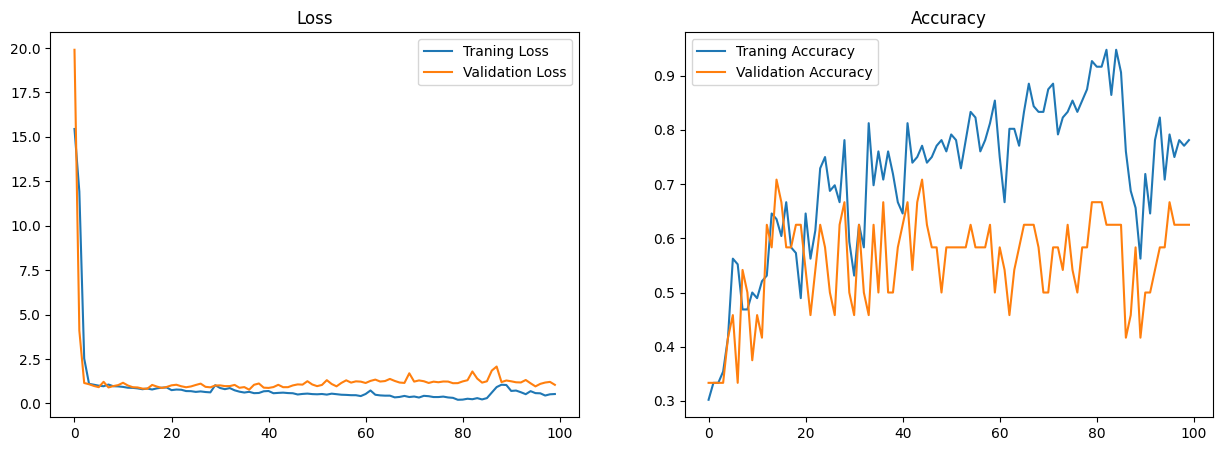

In [22]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss,label="Traning Loss")
plt.plot(range(epoch),val_loss,label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epoch),accuracy,label="Traning Accuracy")
plt.plot(range(epoch),val_accuracy,label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

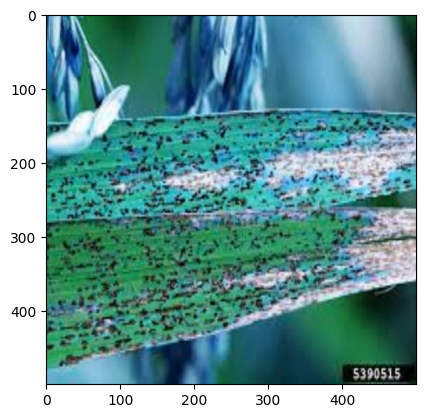

1/1 [==============================] - 0s 241ms/step
Predicted Label: 1
Predicted Emotion: ['Brown spot']


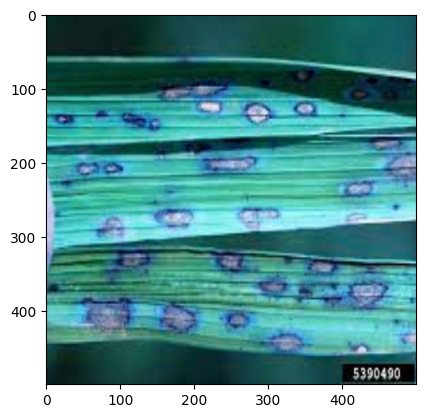

1/1 [==============================] - 0s 26ms/step
Predicted Label: 1
Predicted Emotion: ['Brown spot']


In [23]:
image_paths = ["/content/smut.jpg", "/content/b_spots.jpg"]

# Loop through each image path
for image_path in image_paths:
    try_image = cv2.imread(image_path)
    try_image = cv2.resize(try_image, (image_width, image_height))
    try_image = try_image / 255.0

    plt.imshow(try_image)
    plt.show()

    try_image = try_image.reshape(1, image_width, image_height, 3)

    if len(try_image.shape) > 2 and try_image.shape[2] == 4:
        q = cv2.cvtColor(try_image, cv2.COLOR_BGRA2BGR)
        prediction = np.argmax(model.predict([q]))
    else:
        prediction = np.argmax(model.predict([try_image]))

    print("Predicted Label:", prediction)
    print("Predicted Emotion:", encode.inverse_transform([prediction]))